In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("azalhowaide/iot-dataset-for-intrusion-detection-systems-ids")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iot-dataset-for-intrusion-detection-systems-ids


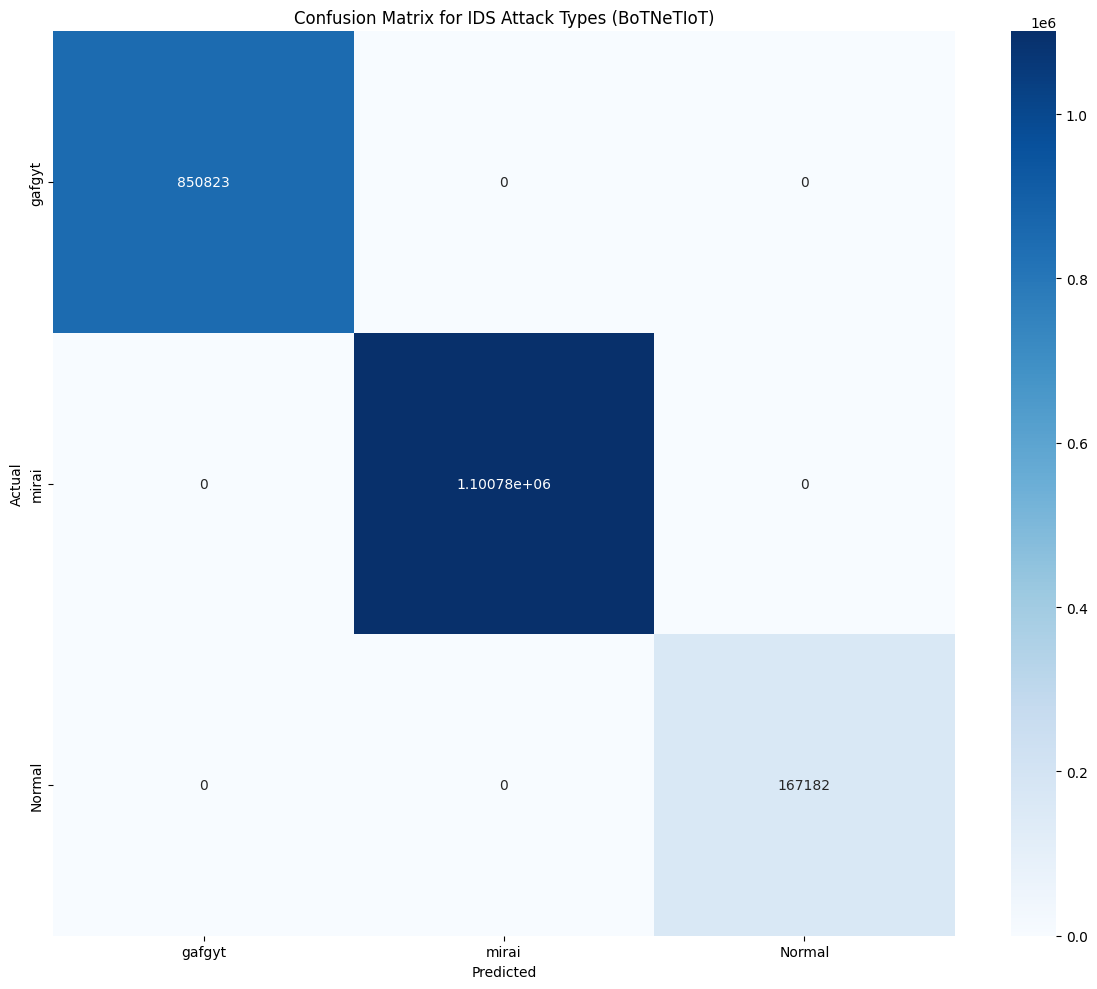

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Load the dataset
# Assuming 'BoTNeTIoT-L01-v2.csv' is the correct file
file_path = os.path.join(path, 'BoTNeTIoT-L01-v2.csv')
df = pd.read_csv(file_path)

# Step 1: Filter relevant attack types
# Updated attack types based on the unique values found in the 'Attack' column
attack_types = ['gafgyt', 'mirai', 'Normal']

df_filtered = df[df['Attack'].isin(attack_types)]

# Step 2: Prepare features and labels
# Assuming 'Attack' is the label column and the rest are features
X = df_filtered.drop(columns=['Attack', 'Device_Name', 'Attack_subType', 'label']) # Dropping additional non-feature columns
y = df_filtered['Attack']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 5: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=attack_types)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=attack_types, yticklabels=attack_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for IDS Attack Types (BoTNeTIoT)')
plt.tight_layout()

# Save high-resolution image
plt.savefig('confusion_matrix_botnetiot.png', dpi=300)
plt.show()

In [ ]:
plt.savefig('confusion_matrix_botnetiot1.png', dpi=600)

<Figure size 640x480 with 0 Axes>